# EP2: CUDA & OpenMPI

## Entrega do EP2

Preencha o nome dos 5 membros do seu grupo na tabela abaixo:

| Nome | NUSP |
|------|------|
| André Akira Hayashi | 9293011 |
| Mateus Agostinho dos Anjos | 9298191 |
| Renan Tiago dos Santos Silva | 9793606 |
| Rodrigo Toscano Ney | 11361219 |
| Bruno Picoli Romano | 6402851 |

In [1]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
  [8314cec4] ↑ PGFPlotsX v1.2.6 ⇒ v1.2.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [8314cec4] ↑ PGFPlotsX v1.2.6 ⇒ v1.2.8


In [2]:
import Pkg;
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add(Pkg.PackageSpec(;name="PGFPlotsX", version="1.2.6"))
Pkg.build("PGFPlotsX")
Pkg.add("Plots")
Pkg.add("Query")
Pkg.add("StatsPlots")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [8314cec4] ↓ PGFPlotsX v1.2.8 ⇒ v1.2.6
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [8314cec4] ↓ PGFPlotsX v1.2.8 ⇒ v1.2.6
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
 

In [3]:
] st

Status `~/.julia/environments/v1.4/Project.toml`
  [336ed68f] CSV v0.7.3
  [a93c6f00] DataFrames v0.21.4
  [7073ff75] IJulia v1.21.2
  [8314cec4] PGFPlotsX v1.2.6
  [91a5bcdd] Plots v1.5.4
  [1a8c2f83] Query v0.12.2
  [f3b207a7] StatsPlots v0.14.6


### Função de leitura para arquivos .csv

In [4]:
using CSV

function read_csv_results(filename)
    copy = CSV.read(filename)
    return copy
end

read_csv_results (generic function with 1 method)

### Funções Parse

In [5]:
using DataFrames, Query, StatsPlots, Statistics
function parse_results_threads(results)
    parsed_results = results |>
                    @groupby(_.threads) |>
                    @map({threads = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

function parse_results_iteration(results)
    parsed_results = results |>
                    @groupby(_.iteration) |>
                    @map({iteration = key(_),
                          mean_time = mean(_.time_elapsed),
                          ci_time = 1.96 * std(_.time_elapsed)}) |>
                    DataFrame
    
    return parsed_results
end

parse_results_iteration (generic function with 1 method)

### Leitura e parse dos resultados sequenciais

In [6]:
seq_triple_spiral = read_csv_results("results_seq_triple_spiral_noio.csv")
parsed_threads_seq_triple_spiral = (parse_results_threads(seq_triple_spiral))
parsed_iteration_seq_triple_spiral = (parse_results_iteration(seq_triple_spiral))

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /home/akira/.julia/packages/CSV/W9RT2/src/CSV.jl:40


,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,22.1969,NaN
2,2,22.3583,NaN
3,3,22.1904,NaN
4,4,22.1909,NaN
5,5,22.1964,NaN
6,6,22.1899,NaN
7,7,22.1931,NaN
8,8,22.1983,NaN


### Leitura e parse dos resultados de Pthreads e OpenMP

In [7]:
pth_triple_spiral = read_csv_results("results_pth_triple_spiral_noio.csv")
parsed_threads_pth_triple_spiral = (parse_results_threads(pth_triple_spiral))
parsed_iteration_pth_triple_spiral = (parse_results_iteration(pth_triple_spiral))

omp_triple_spiral = read_csv_results("results_omp_triple_spiral_noio.csv")
parsed_threads_omp_triple_spiral = (parse_results_threads(omp_triple_spiral))
parsed_iteration_omp_triple_spiral = (parse_results_iteration(omp_triple_spiral))

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /home/akira/.julia/packages/CSV/W9RT2/src/CSV.jl:40
┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /home/akira/.julia/packages/CSV/W9RT2/src/CSV.jl:40


,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,10.2685,12.2909
2,2,10.2721,12.2465
3,3,10.2795,12.2408
4,4,10.2927,12.2121
5,5,10.3164,12.2111
6,6,10.3156,12.177
7,7,10.3254,12.1858
8,8,10.3294,12.1734


### Leitura e parse dos resultados do CUDA

In [8]:
cuda_triple_spiral = read_csv_results("results_cuda_triple_spiral.csv")
parsed_threads_cuda_triple_spiral = (parse_results_threads(cuda_triple_spiral))
parsed_iteration_cuda_triple_spiral = (parse_results_iteration(cuda_triple_spiral))

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /home/akira/.julia/packages/CSV/W9RT2/src/CSV.jl:40


,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,0.710512,0.0334223
2,2,0.710862,0.0135739
3,3,0.719982,0.02325
4,4,0.71256,0.0261993
5,5,0.70973,0.0275163
6,6,0.720868,0.0186025
7,7,0.72845,0.0190411
8,8,0.727308,0.0222488


### Leitura e parse dos resultados do OMPI

In [9]:
ompi_triple_spiral = read_csv_results("results_ompi_triple_spiral.csv")
parsed_threads_ompi_triple_spiral = (parse_results_threads(ompi_triple_spiral))
parsed_iteration_ompi_triple_spiral = (parse_results_iteration(ompi_triple_spiral))

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /home/akira/.julia/packages/CSV/W9RT2/src/CSV.jl:40


,iteration,mean_time,ci_time
,Int64,Float64,Float64
1,1,9.83536,11.4659
2,2,9.84052,11.5043
3,3,9.81962,11.498
4,4,9.82162,11.4967
5,5,9.82236,11.4868
6,6,9.83923,11.4725
7,7,9.82042,11.5048
8,8,9.83832,11.4662


### Funções Plot

In [10]:
using Plots
pgfplotsx()

function plot_results_iteration(x, y, x_label, y_label, series_label; yerror = [], max_size_iteration)      
    if yerror != []
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_size_iteration],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    else
        p = scatter(x,
            y,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [x for x in 1:max_size_iteration],
            alpha = 0.6,
            labels = series_label,
            legend = :top)
    end
    
    return p
end

function plot_results_thread(x, y, x_label, y_label, series_label; yerror = [], max_thread_power = 1)      
    if yerror != []
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2^x for x in 1:max_thread_power],
            yerror = yerror,
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    else
        p = scatter(x,
            y,
            xaxis = :log2,
            xlabel = x_label,
            ylabel = y_label,
            xticks = [2^x for x in 1:max_thread_power],
            alpha = 0.6,
            labels = series_label,
            legend = :topright)
    end
    
    return p
end

plot_results_thread (generic function with 1 method)

## Gráficos

Os gráficos foram gerados rodando as versões sem I/O, com **15** repetições, tamanho
da imagem igual a **4096**, e na região **Triple Spiral Valley**, além de realizar **8 iterações** sobre o mesmo código, para que fosse obtido uma maior amostra para a produção dos gráficos.

## Gráficos Sequencial

### Tempo x Iterações

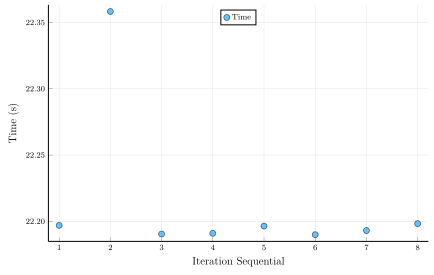

In [11]:
p1 = plot_results_iteration(seq_triple_spiral.iteration,
    seq_triple_spiral.time_elapsed,
    "Iteration Sequential",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
plot(p1)

### Tempo x Threads

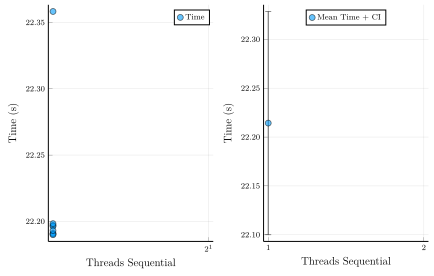

In [12]:
p1 = plot_results_thread(seq_triple_spiral.threads,
    seq_triple_spiral.time_elapsed,
    "Threads Sequential",
    "Time (s)",
    "Time",
    max_thread_power = 1)
p2 = plot_results_iteration(parsed_threads_seq_triple_spiral.threads,
    parsed_threads_seq_triple_spiral.mean_time,
    "Threads Sequential",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_seq_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1, p2)

## Gráficos Pthread

### Tempo x Iterações

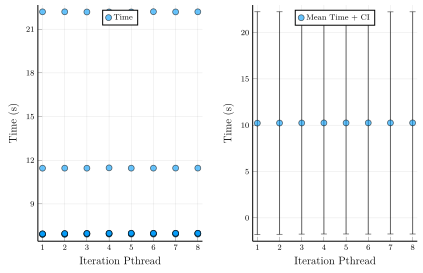

In [13]:
p1 = plot_results_iteration(pth_triple_spiral.iteration,
    pth_triple_spiral.time_elapsed,
    "Iteration Pthread",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_pth_triple_spiral.iteration,
    parsed_iteration_pth_triple_spiral.mean_time,
    "Iteration Pthread",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_pth_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1,p2)

### Tempo x Threads

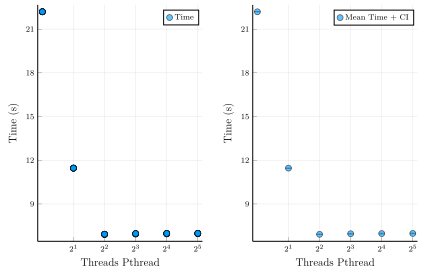

In [14]:
p1 = plot_results_thread(pth_triple_spiral.threads,
    pth_triple_spiral.time_elapsed,
    "Threads Pthread",
    "Time (s)",
    "Time",
    max_thread_power = 5)
p2 = plot_results_thread(parsed_threads_pth_triple_spiral.threads,
    parsed_threads_pth_triple_spiral.mean_time,
    "Threads Pthread",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_pth_triple_spiral.ci_time,
    max_thread_power = 5)
plot(p1,p2)

## Gráficos OpenMP

### Tempo x Iterações

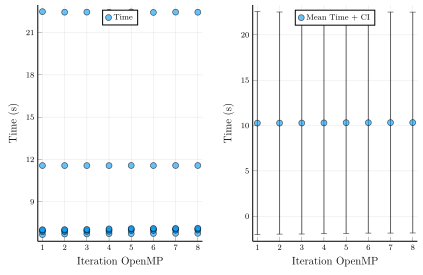

In [15]:
p1 = plot_results_iteration(omp_triple_spiral.iteration,
    omp_triple_spiral.time_elapsed,
    "Iteration OpenMP",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_omp_triple_spiral.iteration,
    parsed_iteration_omp_triple_spiral.mean_time,
    "Iteration OpenMP",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_omp_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1,p2)

### Tempo x Threads

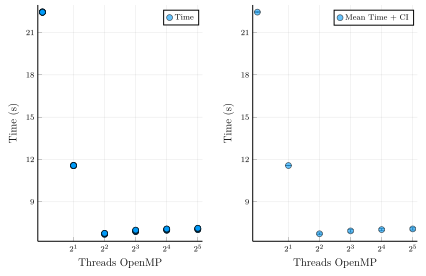

In [16]:
p1 = plot_results_thread(omp_triple_spiral.threads,
    omp_triple_spiral.time_elapsed,
    "Threads OpenMP",
    "Time (s)",
    "Time",
    max_thread_power = 5)
p2 = plot_results_thread(parsed_threads_omp_triple_spiral.threads,
    parsed_threads_omp_triple_spiral.mean_time,
    "Threads OpenMP",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_omp_triple_spiral.ci_time,
    max_thread_power = 5)
plot(p1,p2)

## Gráficos CUDA

### Tempo x Iterações

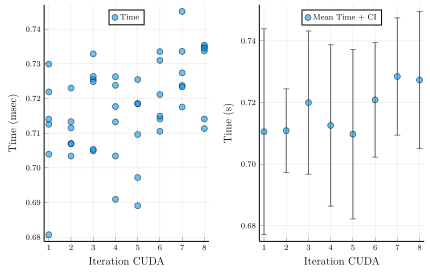

In [17]:
p1 = plot_results_iteration(cuda_triple_spiral.iteration,
    cuda_triple_spiral.time_elapsed,
    "Iteration CUDA",
    "Time (msec)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_cuda_triple_spiral.iteration,
    parsed_iteration_cuda_triple_spiral.mean_time,
    "Iteration CUDA",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_cuda_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1, p2)

### Tempo x Threads

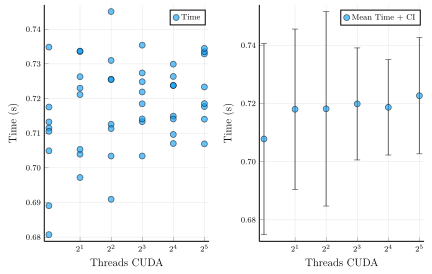

In [18]:
p1 = plot_results_thread(cuda_triple_spiral.threads,
    cuda_triple_spiral.time_elapsed,
    "Threads CUDA",
    "Time (s)",
    "Time",
    max_thread_power = 5)
p2 = plot_results_thread(parsed_threads_cuda_triple_spiral.threads,
    parsed_threads_cuda_triple_spiral.mean_time,
    "Threads CUDA",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_cuda_triple_spiral.ci_time,
    max_thread_power = 5)
plot(p1,p2)

## Gráficos OpenMPI

### Tempo x Iterações

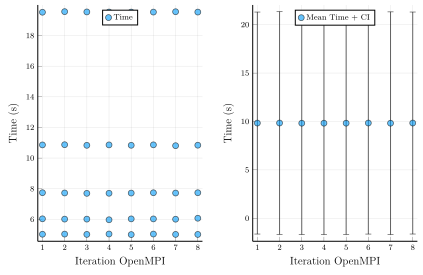

In [19]:
p1 = plot_results_iteration(ompi_triple_spiral.iteration,
    ompi_triple_spiral.time_elapsed,
    "Iteration OpenMPI",
    "Time (s)",
    "Time",
    max_size_iteration = 8)
p2 = plot_results_iteration(parsed_iteration_ompi_triple_spiral.iteration,
    parsed_iteration_ompi_triple_spiral.mean_time,
    "Iteration OpenMPI",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_iteration_ompi_triple_spiral.ci_time,
    max_size_iteration = 8)
plot(p1,p2)

### Tempo x Threads

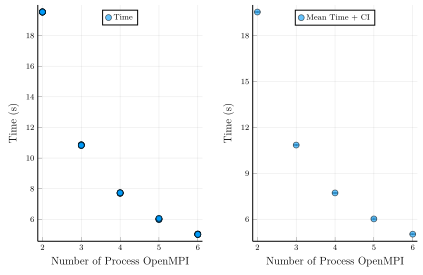

In [20]:
p1 = plot_results_iteration(ompi_triple_spiral.threads,
    ompi_triple_spiral.time_elapsed,
    "Number of Process OpenMPI",
    "Time (s)",
    "Time",
    max_size_iteration = 6)
p2 = plot_results_iteration(parsed_threads_ompi_triple_spiral.threads,
    parsed_threads_ompi_triple_spiral.mean_time,
    "Number of Process OpenMPI",
    "Time (s)",
    "Mean Time + CI",
    yerror = parsed_threads_ompi_triple_spiral.ci_time,
    max_size_iteration = 6)
plot(p1,p2)

### Análises

#### Iterações
Pelos gráficos apresentados nota-se que praticamente não há nenhuma diferença grande nos tempos de execução se repetir o código várias vezes, o CUDA é uma exceção, pois o seu intervalo no eixo y é mais preciso que os outros casos. 

O grande intervalo de confiança apresentado nos gráficos de "Tempo x Iterações", no caso do CUDA acontece como no caso anterior, pelo seu pequeno intervalo no eixo y, ja nos outros casos ocorre, pois sempre há a execucao com uma thread que executa com o mesmo tempo que o caso sequencial, o que causa um outlier em relação com os outros pontos que executam com mais threads.

Em relação ao tempo médio de execução, temos que o sequencial ainda é o mais lento com aproximadamente 22 segundos, e as versoes com Pthreads, OpenMP e OpenMPI, possuem praticamente o mesmo tempo médio de aproximadamente 10 segundos e por último o que possui o tempo mais rápido entre todas as versões, o CUDA com cerca de 0.71 segundos de tempo de execução.

#### Numero de threads, Dimensões (x, y) do grid e dos blocos e Número de processos

Nos casos em que são utilizadas as threads como no **OpenMP** e no **Pthreads**, percebe-se que após a utilização de 4 threads o tempo se mantém constante, com um valor menor que 1, pois esse foi o limite máximo em que mais threads geram mais performance e passou a ter threads brigando por recursos não existentes atrasando o processamento.

No **OpenMPI** esse valor menor que 1, só foi alcançado com um número de processos igual a 6, pois (...)

No **CUDA** o tempo de execução sempre foi menor que 1, sendo que quando sua dimensão é igual a 1, ele apresentou tempos um pouco menores, sendo que com o restante das outras dimensões o tempo se manteve relativamente constante, isso ocorreu devido (...)

Em todos os casos a intervalo de confiança foi muito pequeno para ser considerado.